In [38]:
import warnings
import umap
import torch

import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn import decomposition, preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from collections import Counter
from scipy import stats
from scipy.spatial import distance
from annoy import AnnoyIndex

from IPython.display import display, Markdown

from torch.nn import functional as F

from news_vec.encoder import read_preds

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [40]:
warnings.simplefilter('ignore')
alt.data_transformers.enable('default', max_rows=None)
pd.options.display.max_rows = 200

In [41]:
df, embeds = read_preds('../data/huffpo/')

100%|██████████| 28/28 [00:00<00:00, 35.51it/s]


In [42]:
df.label.unique()

array(['huffingtonpost.com.0', 'huffingtonpost.com.1'], dtype=object)

In [43]:
embeds.shape

(27502, 512)

In [44]:
dr = decomposition.PCA(10)
embedding = dr.fit_transform(embeds[df.index])

In [45]:
dr.explained_variance_ratio_

array([0.8071432 , 0.04100645, 0.01803063, 0.01603043, 0.01248085,
       0.00731796, 0.00622879, 0.00519729, 0.0040722 , 0.00332277],
      dtype=float32)

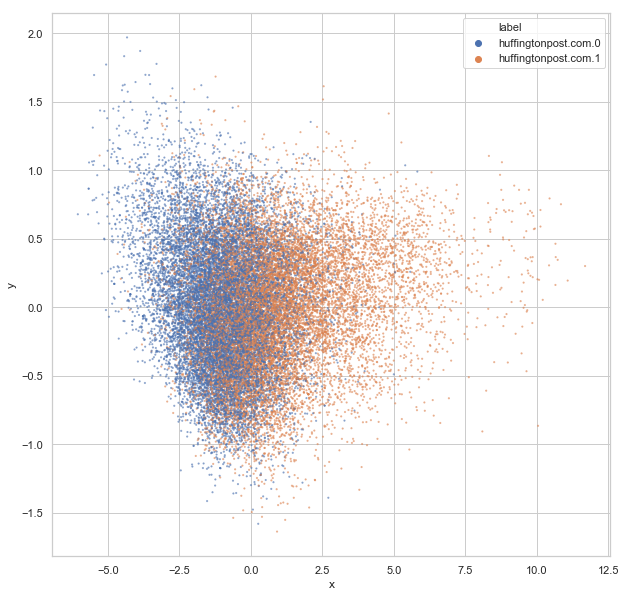

In [46]:
points = df.copy()
points['x'] = embedding[:,0]
points['y'] = embedding[:,1]

plt.figure(figsize=(10,10))

sns.scatterplot(
    x='x',
    y='y',
    data=points,
    s=2,
    edgecolor=None,
    alpha=0.5,
    hue='label',
)

In [47]:
pdf = df.copy()
pdf['tokens_key'] = pdf.clf_tokens.apply(lambda ts: tuple(ts))
pdf = pdf.drop_duplicates('tokens_key')

dr = umap.UMAP(metric='cosine', verbose=True, n_neighbors=10)
UMAP_EMBEDDING = dr.fit_transform(embeds[pdf.index])

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='cosine',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=10, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	 6  /  15
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


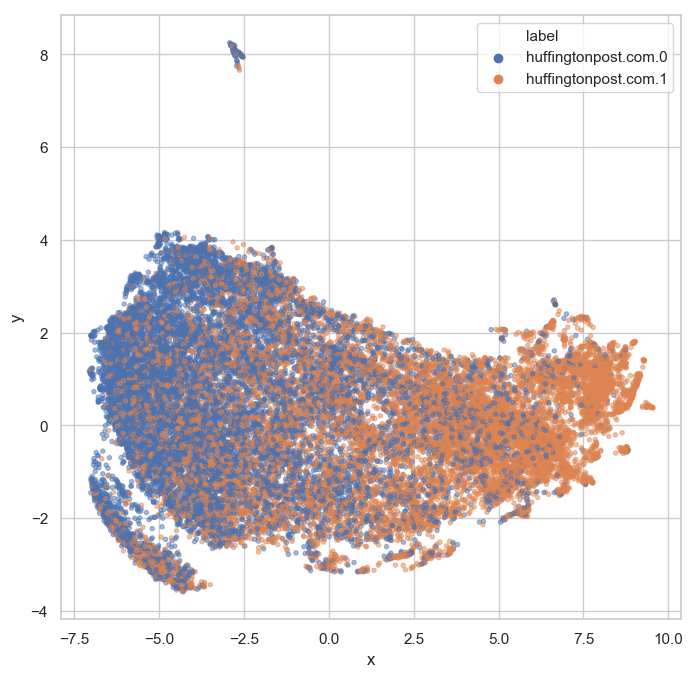

In [48]:
UMAP_POINTS = pdf.copy()
UMAP_POINTS['x'] = UMAP_EMBEDDING[:,0]
UMAP_POINTS['y'] = UMAP_EMBEDDING[:,1]

plt.figure(figsize=(8,8), dpi=100)

sns.scatterplot(
    x='x',
    y='y',
    data=UMAP_POINTS,
    s=10,
    edgecolor=None,
    alpha=0.5,
    hue='label',
)

In [26]:
idx = AnnoyIndex(embeds.shape[1])

for i, v in enumerate(embeds):
    idx.add_item(i, v)
    
idx.build(20)

True

In [25]:
dv = embeds[df[df.lr==0].index].mean(0) - embeds[df[df.lr==1].index].mean(0)

In [27]:
for i in idx.get_nns_by_vector(dv, 20):
    print(df.loc[i].title)

We Have Sex Lives Too : People With A Disability Want To Be More Included This Mardi Gras
Airlines Cheer As Trump Admin Halts Baggage Fee Rule
Appeals Court Denies Request For " Immediate " Order Bringing Back Trump 's Travel Ban
Judge Blocks Immediate Deportation Of Travelers Caught Under Trump 's Refugee Ban
In Pictures : London Grenfell Tower Block Fire
Emma Stone Was Fucking Flawless At The BAFTAs
Behold : The Bacon Wrapped Burger Roll
People Love This Cartoon About Trump 's Travel Ban
Judges Block Immediate Deportation Of Travelers Caught Under Trump 's Refugee Ban
Feds To Appeal Injunction Against Trump 's Travel Ban
16 People Who 100 % Did Not Meet Ed Sheeran
The Supreme Court Upholds Trump 's Travel Ban
Protesters Arrested As Congress Certifies Trump 's Victory
Federal Judge Breaks With Other Judges And Denies Request To Halt Trump 's Ban
17 Events That Had A Higher Attendance Than Trump 's Inauguration
Whatever Happened To The Trump Administration 's Muslim Brotherhood Ban ?
T